# Mapping seismic stations in the Himalayas with Numpy and Matplotlib
## Or reading datasets with custom dtypes and plotting Earth-based data with basemap

In this exercise, we consider loading measurement files with the format:

<pre>
# Station  Lat    Long   Elev 
BIRA	26.4840	87.2670	0.0120
BUNG	27.8771	85.8909	1.1910
etc...
</pre>

These are seismic measurement stations in the Himalaya, with the elevation indicated in km.  Data with a structure such as this is common in many disciplines, and because we have a combination of text and numerical fields, we can't directly load it into a regular numpy array.

But we can use numpy's ability to [define custom data types (dtypes)](http://docs.scipy.org/doc/numpy/reference/arrays.dtypes.html) to compactly describe our data in a single array, which we can then manipulate.

If you have the basemap matplotlib toolkit installed, at the end of this example we will show a real Earth map and overlay the station locations on top of that.

We start by configuring pylab support and loading the required modules.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

Now, we need to describe this dataset.  There are several ways of declaring a dtype, in this simple case we show two equivalent ones.  See the [numpy reference docs](http://docs.scipy.org/doc/numpy/reference/arrays.dtypes.html) for more details:

In [2]:
# Data descriptor to make a proper array.
dt = [('station','S4'), ('lat',np.float32), ('lon',np.float32), ('elev',np.float32) ]

# This is an alternate and fully equivalent form:
dt = dict(names = ('station','lat','lon','elev'),
          formats = ('S4',np.float32,np.float32,np.float32) )

Now, we load the data using this dtype we've constructed, and view it as a recarray for convenient named-field access:

In [3]:
import os
data_fname = os.path.join('data', 'stations.txt')
tab = np.loadtxt(data_fname, dt).view(np.recarray)

In [4]:
ptitle = 'Seismic stations in the Himalaya'
print(ptitle)
print('Stations:', tab.station)
print('Elevations (km):', tab.elev)
print('First station:', tab[0])
print('Mean latitude:', tab.lat.mean())

Seismic stations in the Himalaya
Stations: [b'BIRA' b'BUNG' b'GAIG' b'HILE' b'ILAM' b'JIRI' b'NAMC' b'PHAP' b'PHID'
 b'RUMJ' b'SIND' b'THAK' b'TUML' b'LAZE' b'SAJA' b'ONRN' b'SSAN' b'SAGA'
 b'DINX' b'RBSH' b'NAIL' b'MNBU' b'NLMU' b'YALA' b'XIXI' b'RC14' b'MAZA'
 b'JANA' b'SUKT']
Elevations (km): [ 0.012       1.19099998  0.16599999  2.08800006  1.18099999  1.86600006
  3.523       2.48799992  1.176       1.31900001  0.465       1.551
  0.36000001  4.01100016  4.35099983  4.3499999   4.58500004  4.52400017
  4.37400007  5.0999999   4.37799978  4.5         3.88899994  4.43400002
  4.65999985  4.75600004  4.3670001   0.077       0.745     ]
First station: (b'BIRA', 26.483999252319336, 87.26699829101562, 0.012000000104308128)
Mean latitude: 28.0331


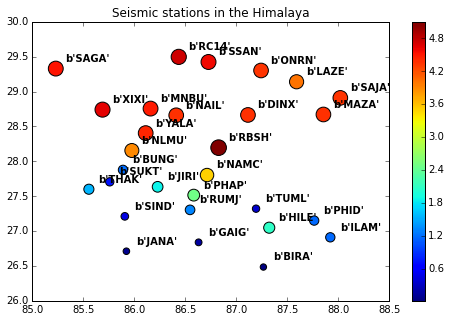

In [5]:
f1, ax = plt.subplots(figsize = (8,5))

# Make the size of the circles proportional to the elevation
sizes = 40*(tab.elev+1)
s = ax.scatter(tab.lon, tab.lat, s=sizes, c=tab.elev)

# The colorbar must be associated with the return value of scatter()
f1.colorbar(s)
ax.set_title(ptitle)
# Now add text labels for all the stations.  

# Note: when accessing single elements of the recarray, the named field
# syntax doesn't work and we must access the fields via ['name']
for record in tab:
    ax.text(record['lon']+0.1, record['lat']+0.1, record['station'], weight='bold')

If we find the matplotlib basemap toolkit, we can show an even better plot by
overlaying the stations on top of a map of Earth at that location.  But we
check this import so the code runs even without basemap.

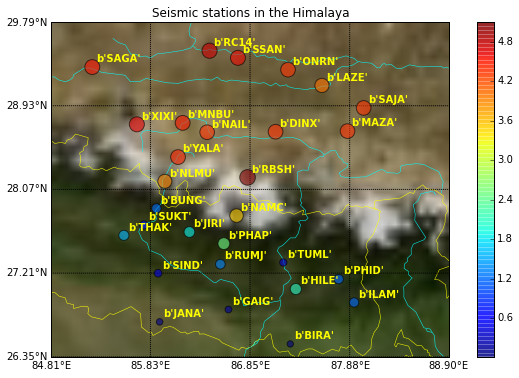

In [6]:
try:
    from mpl_toolkits.basemap import Basemap
except ImportError:
    print("Basemap Not Available, no further plotting.")
else:
    # Draw the stations on a real map of the Earth.
    # Find boundaries 
    lon0 = 0.995*tab.lon.min()
    lon1 = 1.01*tab.lon.max()
    lat0 = 0.995*tab.lat.min()
    lat1 = 1.01*tab.lat.max()
    # Geographic grid to draw
    parallels = np.linspace(lat0, lat1, 5)
    meridians = np.linspace(lon0, lon1, 5)

    # Resolution of the basemap to load ('f' is *very* expensive)
    resolution = 'i' # intermediate resolution for map info

    f2, ax2 = plt.subplots(figsize=(10,6))
    m = Basemap(lon0, lat0, lon1, lat1, resolution=resolution, ax=ax2)
    m.drawcountries(color=(1,1,0))  # country boundaries yellow
    m.drawrivers(color=(0,1,1))  # rivers in cyan
    m.bluemarble()  # NASA bluemarble image
    m.drawparallels(parallels, labels=[1,0,0,0], fmt='%.2f')
    m.drawmeridians(meridians, labels=[0,0,0,1], fmt='%.2f')
    s = m.scatter(tab.lon, tab.lat, s=sizes, c=tab.elev, zorder=10, alpha=0.6)
    f2.colorbar(s)
    ax2.set_title(ptitle)
    for record in tab:
        ax2.text( record['lon']+0.05, record['lat']+0.05, record['station'], 
                weight='bold', color='yellow', zorder=10)